<a href="https://colab.research.google.com/github/mcnica89/DATA6100_F23/blob/main/Bootstrap/Medians.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

In [29]:
np.random.seed(1)
Num_of_Each = 101
Num_Types = 20

X = 2*np.random.rand(Num_of_Each,Num_Types)-1

Medians = np.median(X,axis=0)

for i in range(Num_Types):
  print(f"Jelly Bean Type #{i}: {Medians[i]:.2f}")
print("-----")
print(f"Maximum is Type #{np.argmax(Medians)} with effect size {np.max(Medians):.2f}")

Jelly Bean Type #0: -0.13
Jelly Bean Type #1: 0.16
Jelly Bean Type #2: 0.12
Jelly Bean Type #3: 0.16
Jelly Bean Type #4: -0.07
Jelly Bean Type #5: 0.06
Jelly Bean Type #6: 0.16
Jelly Bean Type #7: -0.03
Jelly Bean Type #8: 0.01
Jelly Bean Type #9: 0.10
Jelly Bean Type #10: -0.13
Jelly Bean Type #11: 0.20
Jelly Bean Type #12: -0.11
Jelly Bean Type #13: -0.07
Jelly Bean Type #14: 0.11
Jelly Bean Type #15: -0.01
Jelly Bean Type #16: 0.04
Jelly Bean Type #17: 0.05
Jelly Bean Type #18: 0.18
Jelly Bean Type #19: 0.12
-----
Maximum is Type #11 with effect size 0.20


# Toy Example: Medians

Lets make a very simple example that for jellybean data $X_1,\ldots,X_n \in [-1,1]$, the measured effect of the Jelly beans is: $Median(X_1,\ldots,X_n)$. We want to know in our sample, how big a "significant effect"?

I.e. We want to understand the MEDIAN of a bunch of centered uniform random variables

In [32]:
N = 101
X = 2*np.random.rand(N)-1
print("Median: ",np.median(X))

Median:  -0.026099507152085755


In [33]:
def plot_and_CI(median_samples,my_title):
  plt.hist( median_samples )
  plt.title(my_title)
  plt.axvline(0.5, color='k', linestyle='dashed', linewidth=1)

  sorted_medians = np.sort(median_samples)
  N_samples = len(sorted_medians)
  CI_up = sorted_medians[int(0.975*N_samples)]
  CI_low = sorted_medians[int(0.025*N_samples)]

  print(f"95% CI: {CI_low:.3f} to {CI_up:.3f}" )
  print(f"95% CI width: {CI_up - CI_low:.3f}")

# Theoretical Medians : Lots of Monte Carlo Samples



95% CI: -0.191 to 0.193
95% CI width: 0.384


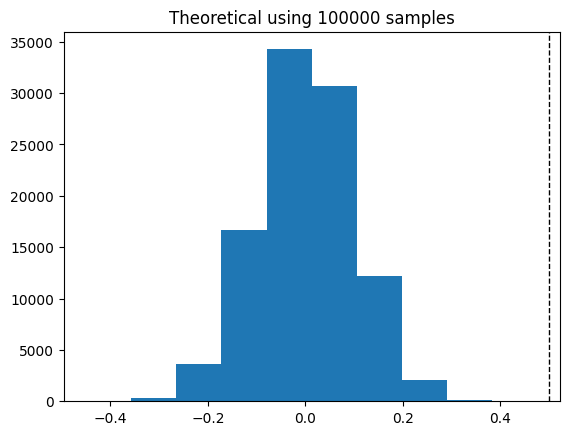

In [40]:
def generate_theory_medians(N,N_samples):
  X = 2*np.random.rand(N,N_samples)-1
  median = np.median(X,axis=0)
  return median

N_samples = 100000
medians = generate_theory_medians(N,N_samples)
plot_and_CI(medians,my_title=f'Theoretical using {N_samples} samples')

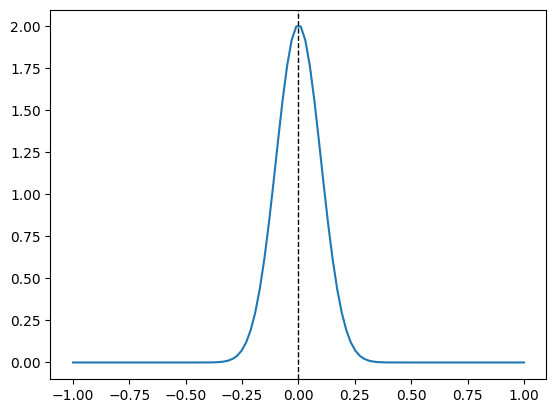

In [41]:
#Theoretically, the median will be a shift of a beta distribution
x_axis = np.linspace(-1,1,100)
k = (N+1)/2
beta = (1+x_axis)**(k)*(1-x_axis)**(k)/sc.beta(k,k)/2**(2*k)
plt.plot(x_axis,beta)
plt.axvline(0, color='k', linestyle='dashed', linewidth=1)

# Using one single data set and Leave One Out Error

In [42]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.41270110742846444


95% CI: 0.411 to 0.416
95% CI width: 0.005


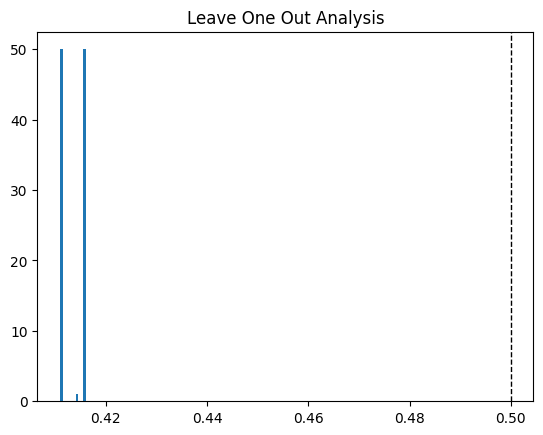

In [43]:
def leave_one_out_analysis(X):
  LOO_median = np.zeros_like(X)
  for i in range(N):
    x_temp = X[i]
    X[i] = np.nan
    LOO_median[i] = np.nanmedian(X)
    X[i] = x_temp
  return LOO_median

plot_and_CI(leave_one_out_analysis(X),'Leave One Out Analysis')

# Using one single data set and "Ordinary" Validation

In [ ]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.44266718510864544


In [ ]:
def test_median_ordinary(X,p_train = 0.5):

  perm = np.random.permutation(N)

  N_train = int(p_train*N)

  X_train,X_test = X[perm[0:N_train]], X[perm[N_train:N]]

  return np.median(X_train)

95% CI: 0.381 to 0.527
95% CI width: 0.146


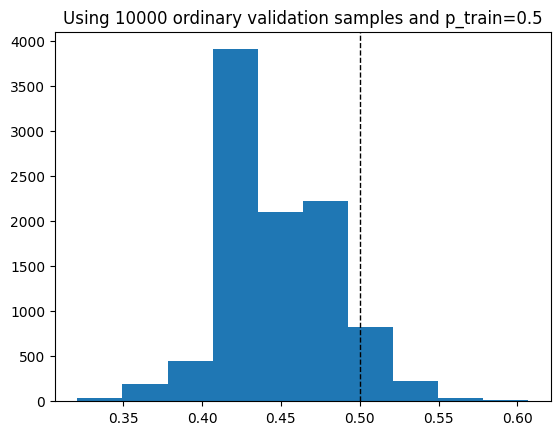

In [ ]:
N_samples = 10000
p_train = 0.5
medians = np.array([test_median_ordinary(X,p_train) for i in range(N_samples)])
plot_and_CI(medians,my_title=f'Using {N_samples} ordinary validation samples and p_train={p_train}')

# Using one single data set and k-Fold Cross Validation

In [ ]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.5050268261972598


In [ ]:
def test_median_k_fold(k=5):

  perm = np.random.permutation(N)

  N_per_fold = int(N/k)
  N_train = [N_per_fold*i for i in range(k+1)]
  X_fold = np.zeros((k,N_per_fold))
  for i in range(k):
    X_fold[i,:] = X[ perm[N_train[i]:N_train[i+1]]]


  return np.median(X_fold,axis=1)

In [ ]:
test_median_k_fold(5)

array([0.57006394, 0.62631208, 0.54129901, 0.39230073, 0.53193398])

95% CI: 0.491 to 0.561
95% CI width: 0.070


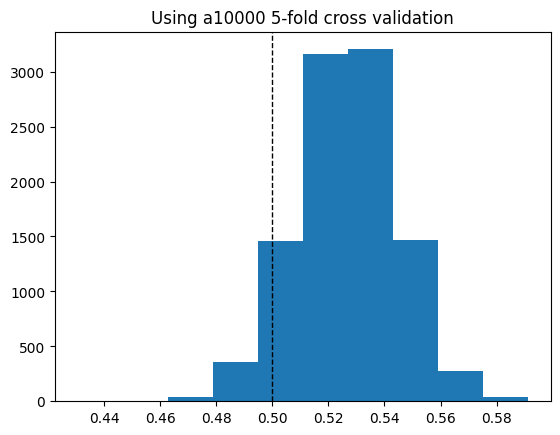

In [ ]:
medians = np.array( [np.mean(test_median_k_fold(5)) for i in range(N_samples)] )
plot_and_CI(medians,my_title=f'Using a{N_samples} 5-fold cross validation')

# Bootstrap

In [ ]:
N = 101
X = np.random.rand(N)
print("Median: ",np.median(X))

Median:  0.5219411282123071


95% CI: 0.376 to 0.619
95% CI width: 0.243


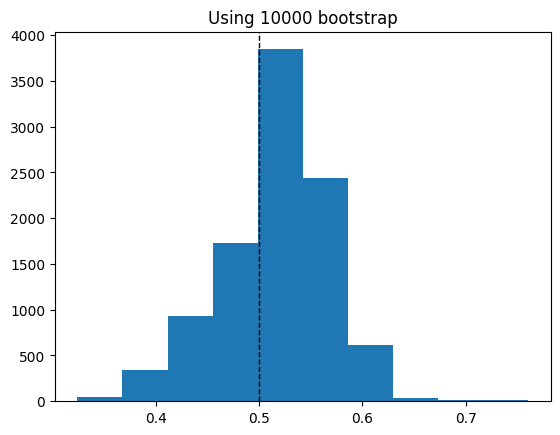

In [ ]:
def test_median_bootstrap():
  ix = np.random.randint(0,N,size=N)
  return np.median(X[ix])

N_samples = 10000
medians = np.array( [test_median_bootstrap() for i in range(N_samples)] )
plot_and_CI(medians,my_title=f'Using {N_samples} bootstrap')

Text(0.5, 1.0, 'Comparison of CDFs')

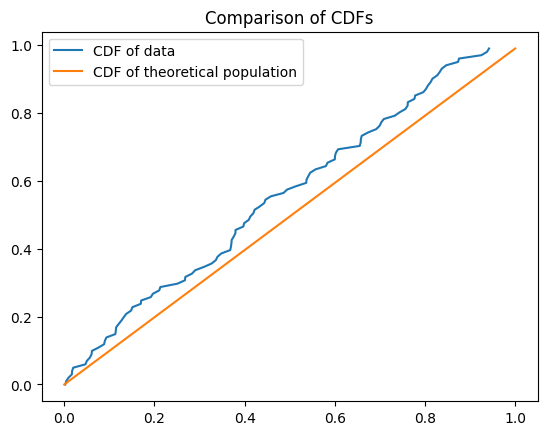

In [44]:
cdf_x = np.sort(X)
cdf_y = np.arange(len(X))/len(X)
plt.plot(cdf_x,cdf_y,label='CDF of data')
plt.plot(np.linspace(0,1,len(X)),cdf_y,label='CDF of theoretical population')
plt.legend()
plt.title("Comparison of CDFs")

# Extra stuff